# Analysis of the Quoted Product using Anaconda Python

The objective of this analysis is: 
* Determing which manufacturers product the dealership was selling the Most.
* Which parts catagories were more likely to be specified.
* What is the distribution of quantity values contained within the Data Set.

In [45]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 89)

#Global Variables
StartDate = '2015-01-01'
EndDate = '2016-01-01'

#Initial DataFrame of Imported Clean Data
df = pd.read_csv('Data/CustomerQuotedProduct_clean.csv', encoding='Latin-1')

In [46]:
df.head()

,fldOrderNumber,fldQuoteNumber,fldQuantity,fldDate,fldPartNumber,fldManufacturer_ID,fldFurnitureSystemID,fldGroupTypeID,fldOpsWorksheetID,fldDescription
0,85306,85306 WS,8,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,FLOAT GLASSBOARD- MARKER BOARD - TEMPERED SAFE...
1,85306,85306 WS,3,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,FLOAT GLASSBOARD- MARKER BOARD - TEMPERED SAFE...
2,85306,85306 WS,2,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,"GO!MOBILE - MOBILE WHITE BOARD 40"" X 54""; 5/32..."
3,52604,52606,1,2016-05-17,NaN,Watson,NaN,Accessories,Lights,Watson Freight
4,51013,51283b,6,2016-03-29,NaN,Herman Miller,NaN,Accessories,Lights,Momentum Textiles:Velocity


In [47]:
df2 = df.loc[(df['fldDate'] >= StartDate) & (df['fldDate'] < EndDate)]
df2.head()

,fldOrderNumber,fldQuoteNumber,fldQuantity,fldDate,fldPartNumber,fldManufacturer_ID,fldFurnitureSystemID,fldGroupTypeID,fldOpsWorksheetID,fldDescription
786,47497,47518,1,2015-10-28,22-2833V,Kimball Office,Seating,Seating,Chair_KD,"MUIRFIELD,HI-BACK,VERTICAL STITCH,KNEE TILT PN..."
787,47497,47518 final,1,2015-10-28,22-2833V,Kimball Office,Seating,Seating,Chair_KD,"MUIRFIELD,HI-BACK,VERTICAL STITCH,KNEE TILT PN..."
839,48124,48173,3,2015-11-23,2222.B1.B.S1,Sit On It,Sit On It Seating,Seating,Chair_KD,"Wit, Midback, Standard Stool Kit, Mesh Back, B..."
980,48559,48561,1,2015-12-10,232092-,Herman Miller,Supplemental Products,Storage,Locks,"*Lock Plug and Key,Black UM Series"
981,48559,48561,2,2015-12-10,232092-,Herman Miller,Supplemental Products,Storage,Locks,"*Lock Plug and Key,Black UM Series"


In [48]:
df2.info()
df2.describe()
#df2.fldQuantity.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 786 to 34403
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fldOrderNumber        656 non-null    object
 1   fldQuoteNumber        656 non-null    object
 2   fldQuantity           656 non-null    int64 
 3   fldDate               656 non-null    object
 4   fldPartNumber         656 non-null    object
 5   fldManufacturer_ID    656 non-null    object
 6   fldFurnitureSystemID  632 non-null    object
 7   fldGroupTypeID        655 non-null    object
 8   fldOpsWorksheetID     655 non-null    object
 9   fldDescription        656 non-null    object
dtypes: int64(1), object(9)
memory usage: 56.4+ KB


,fldQuantity
count,656.000000
mean,5.160061
std,11.640295
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,193.000000


#### These are the General Furniture Catagories that were quoted with the OHMS Calculator.

Text(0.5, 0, 'Furniture Catagories Quoted')

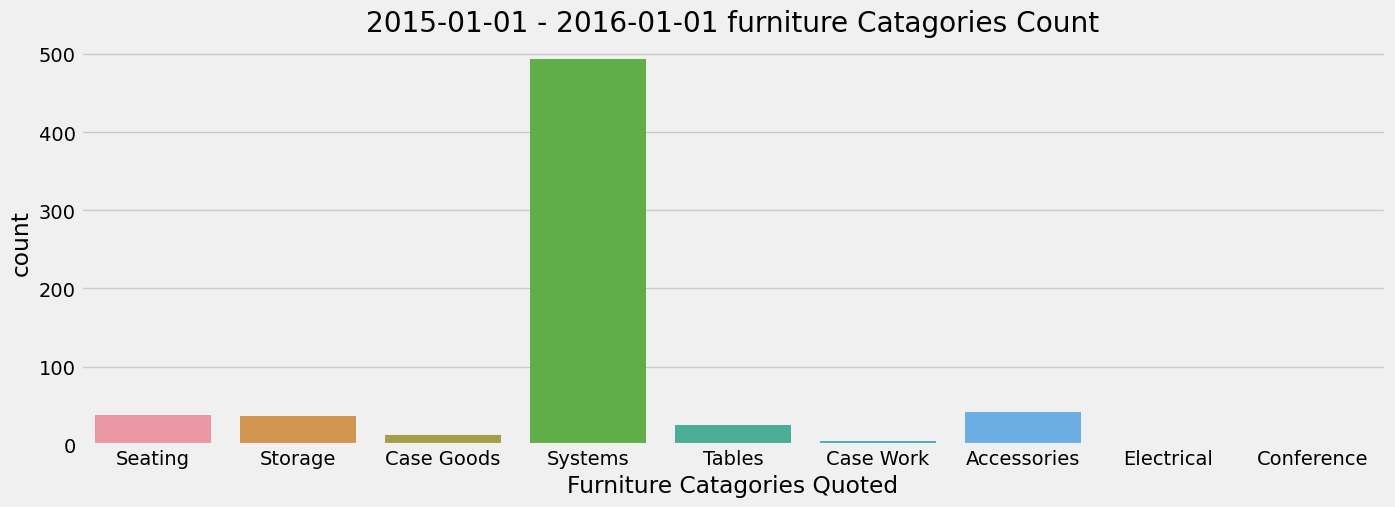

In [49]:
plt.figure(figsize = (15,5))
sns.countplot(x='fldGroupTypeID', data=df2)
plt.title(f'{StartDate} - {EndDate} furniture Catagories Count')
plt.xlabel('Furniture Catagories Quoted')

#### The chart below shows the number of lines that were specified of each part catagory. This is not the quantity of peices that were specified.

Text(0.5, 0, 'count of entries')

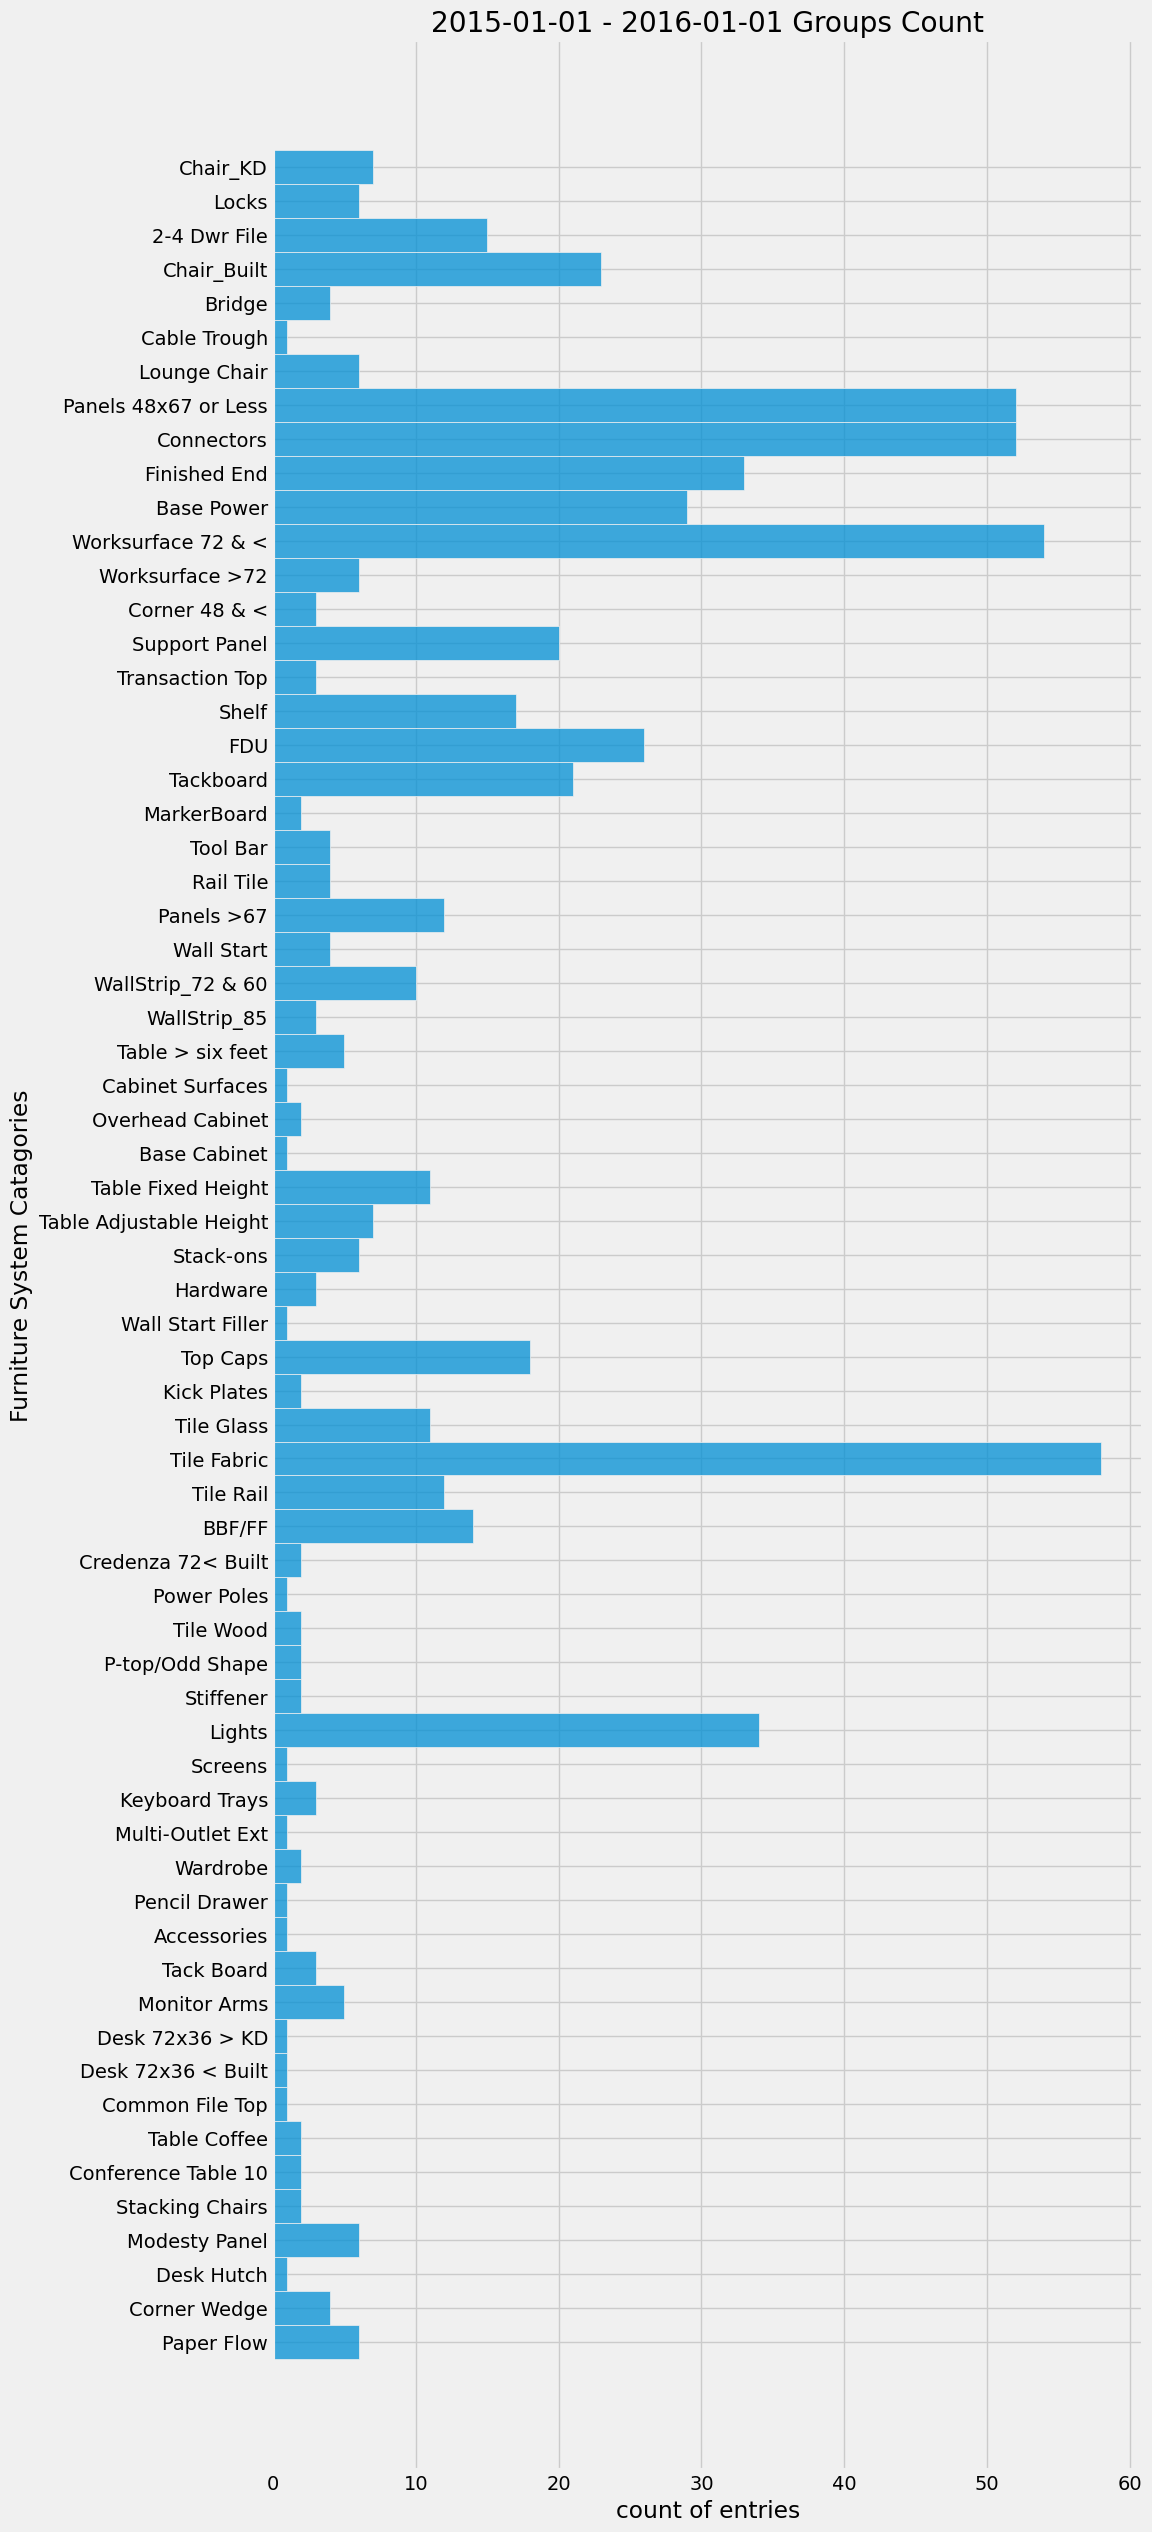

In [50]:
plt.figure(figsize = (10,30))
sns.histplot(y='fldOpsWorksheetID', data=df2)
plt.title(f'{StartDate} - {EndDate} Groups Count')
plt.ylabel('Furniture System Catagories')
plt.xlabel('count of entries')

#### The information shown below indicates that this is a Herman Miller Dealership. The supplimentry products that were place into the mix were Sit-on-it seating, Kimball Office furniture and National Office furniture.

Text(0.5, 0, 'count of Quoted lines')

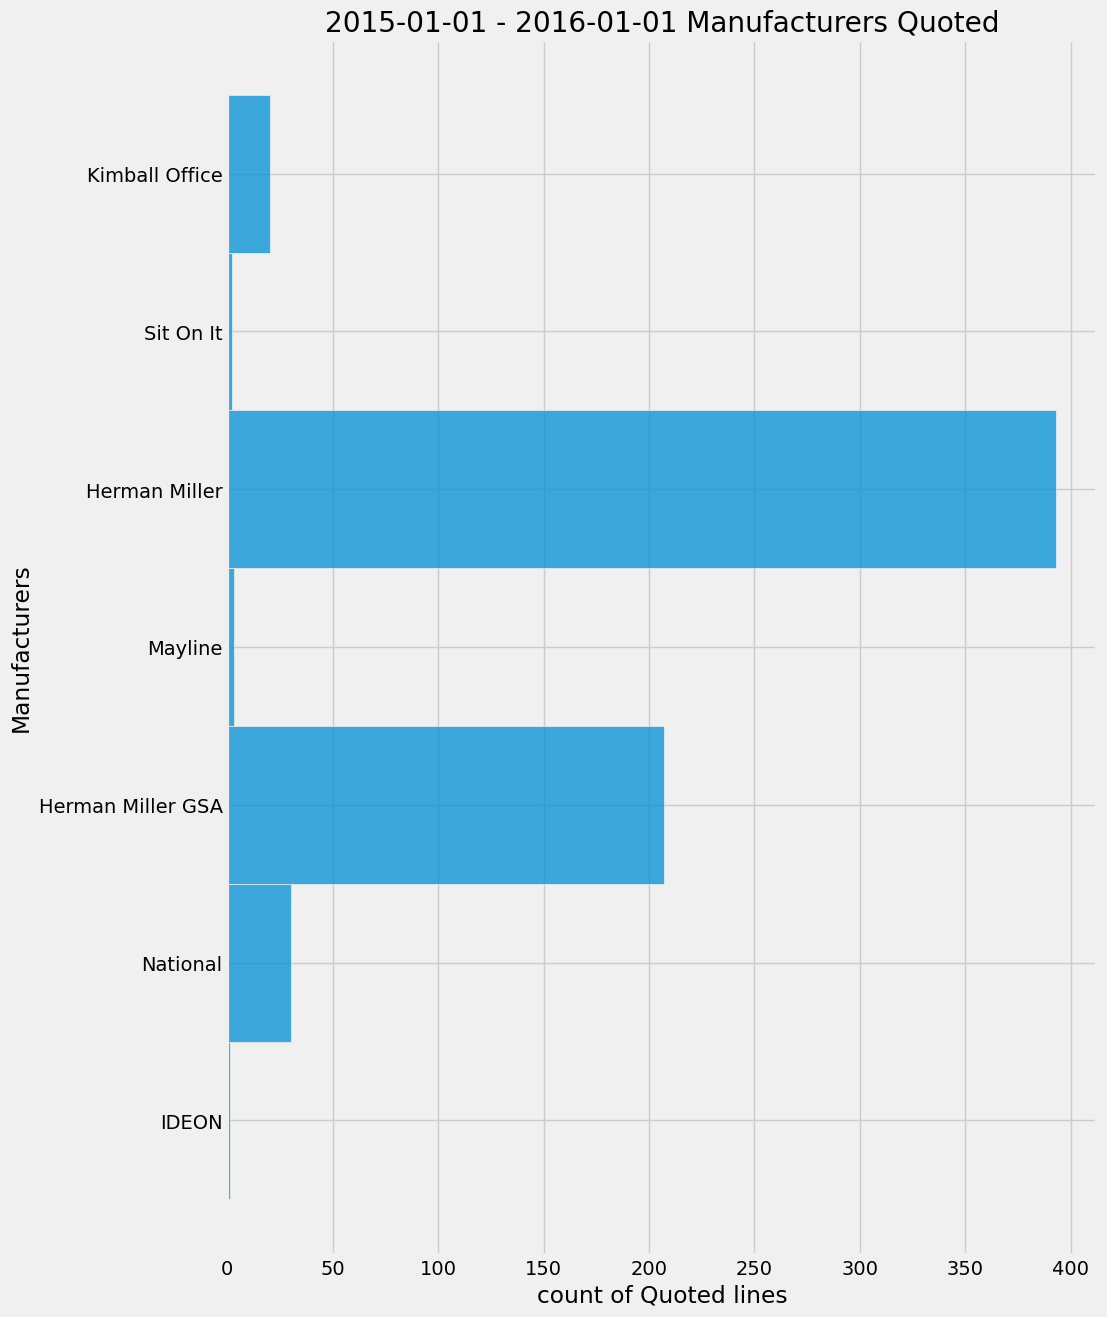

In [51]:
plt.figure(figsize = (10,15))
sns.histplot(y='fldManufacturer_ID', data=df2)
plt.title(f'{StartDate} - {EndDate} Manufacturers Quoted')
plt.ylabel('Manufacturers')
plt.xlabel('count of Quoted lines')

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 786 to 34403
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fldOrderNumber        656 non-null    object
 1   fldQuoteNumber        656 non-null    object
 2   fldQuantity           656 non-null    int64 
 3   fldDate               656 non-null    object
 4   fldPartNumber         656 non-null    object
 5   fldManufacturer_ID    656 non-null    object
 6   fldFurnitureSystemID  632 non-null    object
 7   fldGroupTypeID        655 non-null    object
 8   fldOpsWorksheetID     655 non-null    object
 9   fldDescription        656 non-null    object
dtypes: int64(1), object(9)
memory usage: 56.4+ KB


Text(0.5, 0, 'count of Quantities Quoted per line')

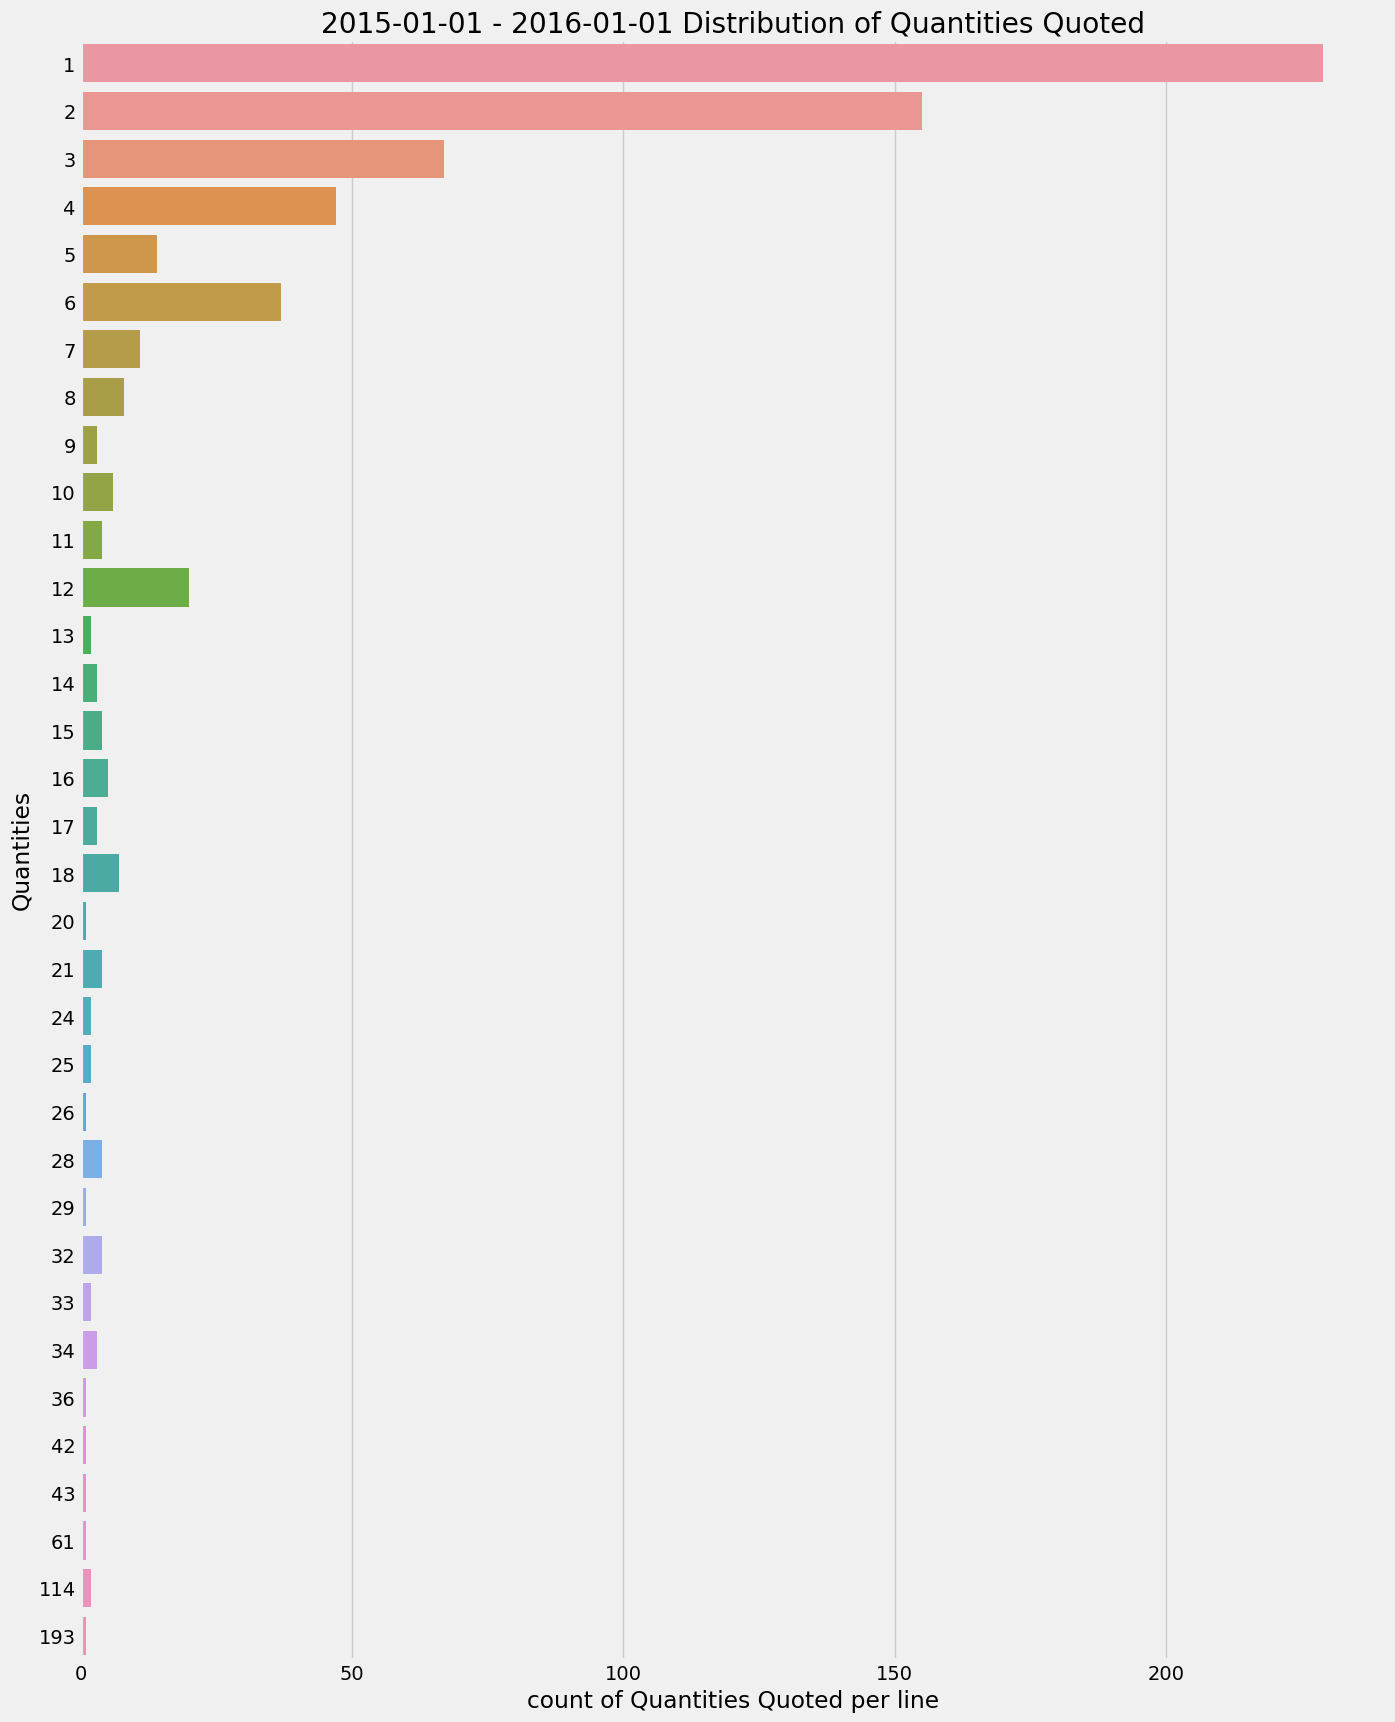

In [53]:
df_Filt = df2.filter(items=['fldManufacturer_ID', 'fldQuantity'])
plt.figure(figsize = (15,20))
sns.countplot(data=df_Filt, y= 'fldQuantity')
plt.title(f'{StartDate} - {EndDate} Distribution of Quantities Quoted')
plt.ylabel('Quantities')
plt.xlabel('count of Quantities Quoted per line')

In [54]:
df.query('fldQuantity == 42')

,fldOrderNumber,fldQuoteNumber,fldQuantity,fldDate,fldPartNumber,fldManufacturer_ID,fldFurnitureSystemID,fldGroupTypeID,fldOpsWorksheetID,fldDescription
55,60081,60524,42,2017-03-31,1021FT1.UPA91,Sit On It,Sit On It Seating,Seating,Chair_Built,"Rio, Four Leg Chair, Upholstered Seat & Back, ..."
4247,YKHC Budget,ykhc,42,2017-03-22,A3410.1260,Herman Miller,Action Office Series 1 & 2 System,Systems,Tackboard,"+Tackboard,B-Style 12H 60W"
4926,NaN,58654 AO2low,42,2017-01-23,A8125.3948G,Herman Miller,Action Office Series 1 & 2 System,Systems,Panels 48x67 or Less,"+Panel,Tac Ac-Barr,Thin Base Pwr 4-Circ W/Com ..."
4943,NaN,58654 AO2low,42,2017-01-23,A8125.6724G,Herman Miller,Action Office Series 1 & 2 System,Systems,Panels 48x67 or Less,"+Panel,Tac Ac-Barr,Thin Base Pwr 4-Circ W/Com ..."
4944,NaN,58654 AO2High,42,2017-01-23,A8125.6724G,Herman Miller,Action Office Series 1 & 2 System,Systems,Panels 48x67 or Less,"+Panel,Tac Ac-Barr,Thin Base Pwr 4-Circ W/Com ..."
5616,64142,Phase III,42,2017-08-28,AO213.72,Herman Miller GSA,GSA Action Office & Quadrant Pedestals,Systems,WallStrip_72 & 60,+Wall Strip 72H
5837,47496,47822,42,2015-11-09,AO215.62,Herman Miller,Action Office Series 1 & 2 System,Systems,Connectors,*Draw Rod 62H
5902,NaN,58654 AO2low,42,2017-01-23,AO219.34,Herman Miller,Action Office Series 1 & 2 System,Systems,Connectors,"+Draw Rod,Chg-of-Ht 34H"
5989,NaN,58654 AO2low,42,2017-01-23,AO272.,Herman Miller,Action Office Series 1 & 2 System,Systems,Finished End,"+Fin End,Chg-of-Ht,Panel/Panel"
13224,77634,78657 2nd fl Mod,42,2019-04-23,FT112.42AP,Herman Miller,Canvas Office Landscape Wall-Based and Private...,Systems,Top Caps,"*Frame Top Cap,Standard Ptd 42W"
